In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

In [3]:
# Load the data into a pandas DataFrame
df = pd.read_csv('combined_dataset.csv')


# Split the data into training and testing sets
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()

# Normalize the input data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Dummy model

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Dummy accuracy:", accuracy)

Dummy accuracy: 0.3689727463312369


In [6]:
knn_baseline = make_pipeline(KNeighborsClassifier())
knn_baseline.fit(X_train, y_train)
print("The score of the baseline Knn model is: ", knn_baseline.score(X_test, y_test))
baseknn_pred = knn_baseline.predict(X_test)
y_score_baseline = knn_baseline.fit(X_train, y_train).predict_proba(X_test)

The score of the baseline Knn model is:  0.8784067085953878


In [7]:
# Create and train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=4)
a_y_pred_knn = knn.fit(X_train, y_train)

# Create and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=150, random_state=22)
a_y_pred_rf = rf.fit(X_train, y_train)


In [8]:
num_experiments = 5
k_values = [4]
n_estimators_values = [125, 150, 175]
test_size = [.2, .25, .3]
best_acc_knn = 0
best_acc_rf = 0

for i in range(num_experiments):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    knn.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    
    # knn tuning using GridSearchCV
    knn = KNeighborsClassifier()
    param_grid = {'n_neighbors': k_values, 'weights': ['distance']}
    grid_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid_knn.fit(X_train, y_train)
    best_k = grid_knn.best_params_['n_neighbors']
    best_w = grid_knn.best_params_['weights']
    knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_w)
    knn.fit(X_train, y_train)
    
    # rf tuning using GridSearchCV
    rf = RandomForestClassifier()
    param_grid = {'n_estimators': n_estimators_values, 'max_features': ['sqrt']}
    grid_rf = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')
    grid_rf.fit(X_train, y_train)
    best_n = grid_rf.best_params_['n_estimators']
    best_f = grid_rf.best_params_['max_features']
    rf = RandomForestClassifier(n_estimators=best_n, max_features=best_f)
    rf.fit(X_train, y_train)
    
    # predictions
    y_pred_knn = knn.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    
    # accuracy
    acc_knn = accuracy_score(y_test, y_pred_knn)
    if(acc_knn > best_acc_knn):
        best_acc_knn = acc_knn
        a_y_pred_knn = y_pred_knn
        a_y_test_knn = y_test
    acc_rf = accuracy_score(y_test, y_pred_rf)
    if(acc_rf> best_acc_rf):
        best_acc_rf = acc_rf
        a_y_pred_rf = y_pred_rf
        a_y_test_rf = y_test
    print(f"Experiment {i+1}: kNN accuracy = {acc_knn:.3f}, RF accuracy = {acc_rf:.3f}")



Experiment 1: kNN accuracy = 0.884, RF accuracy = 0.977
Estimators = 150
Experiment 2: kNN accuracy = 0.845, RF accuracy = 0.963
Estimators = 175
Experiment 3: kNN accuracy = 0.877, RF accuracy = 0.970
Estimators = 175
Experiment 4: kNN accuracy = 0.879, RF accuracy = 0.975
Estimators = 175
Experiment 5: kNN accuracy = 0.870, RF accuracy = 0.975
Estimators = 125


0.8836477987421384
0.9769392033542977


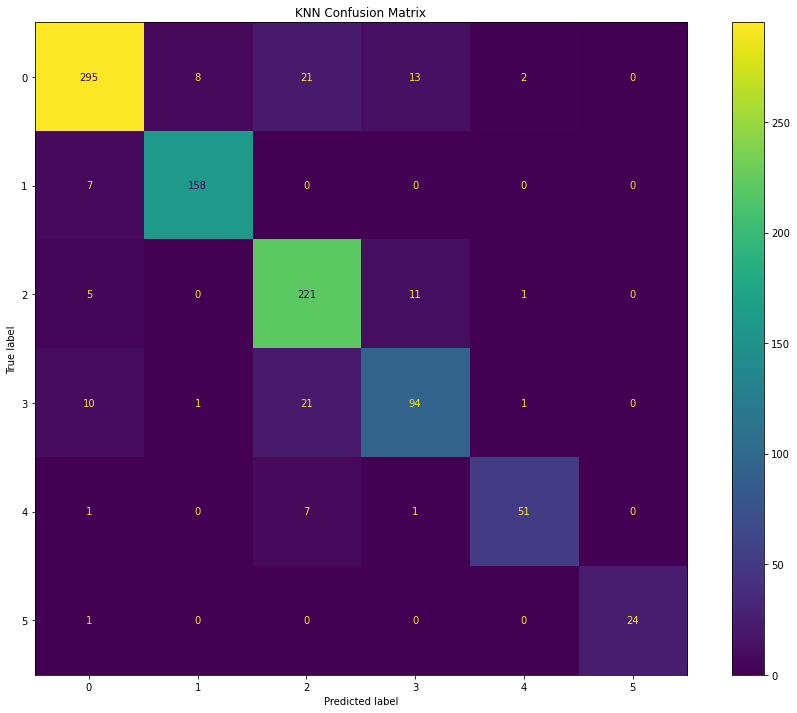

array([0.87020649, 0.95757576, 0.92857143, 0.74015748, 0.85      ,
       0.96      ])

In [9]:
knncm = confusion_matrix(a_y_test_knn, a_y_pred_knn)
print(best_acc_knn)
print(best_acc_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=knncm)
fig, ax = plt.subplots(figsize=(16, 12))
disp.plot(ax=ax)
plt.savefig('cm_knn.png', dpi=300)
plt.title('KNN Confusion Matrix')
plt.show()
knncm.diagonal()/knncm.sum(axis=1)

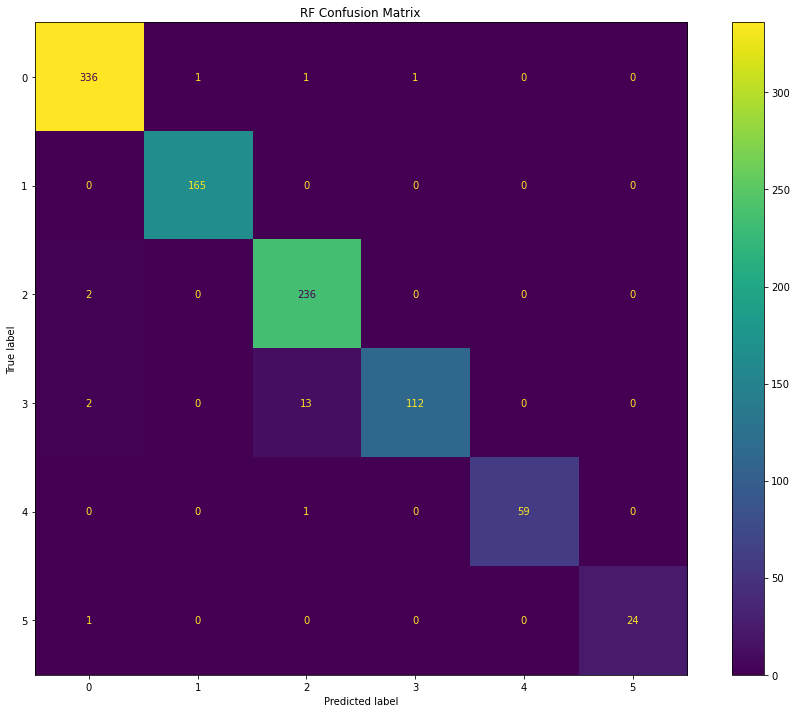

array([0.99115044, 1.        , 0.99159664, 0.88188976, 0.98333333,
       0.96      ])

In [10]:
rfcm = confusion_matrix(a_y_test_rf, a_y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=rfcm)
fig, ax = plt.subplots(figsize=(16, 12))
disp.plot(ax=ax)
plt.savefig('cm_rf.png', dpi=300)
plt.title('RF Confusion Matrix')
plt.show()
rfcm.diagonal()/rfcm.sum(axis=1)